### ESMA 3016
### Edgar Acuna
### Lab24: Comparando  media de dos poblaciones (varianzas distintas) y Muestras pareadas

In [1]:
import numpy as np
from math import sqrt
import pandas as pd
from scipy import stats
from scipy.stats  import norm, t, f, ttest_1samp
import statsmodels.api as sm
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Haciendo una funcion que halle p-value de la prueba estadistica de F
#para probar igualdad de varianza de dos grupos
def Ftest(grupo1,grupo2):
    #Esta funcion calcula el p-value de la prueba F
    a1 = 1.0*np.array(grupo1)
    n1 = len(a1)
    a2 = 1.0*np.array(grupo2)
    n2 = len(a2)
    s1, s2 = np.std(a1,ddof=1), np.std(a2,ddof=1)
    test=(s1/s2)**2
    p_value=2*min(f.cdf(test,n1-1,n2-1),1-f.cdf(test,n1-1,n2-1))
    print("La prueba de F es:",test,"El p-value es:", p_value)    
    return

### I. Comparando el GPA  de graduandos segun su genero

In [4]:
#Leyendo los datos para comparar los gpa segun el genero del estudiante
gpasex=pd.read_csv("http://academic.uprm.edu/eacuna/gpasex.csv",sep=",")

In [5]:
gpasex

,gpa,genero
0,3.58,mujer
1,3.44,mujer
2,3.61,mujer
3,2.69,mujer
4,3.66,mujer
5,3.35,mujer
6,3.23,mujer
7,3.36,mujer
8,2.88,mujer
9,2.80,mujer


In [6]:
gpasex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 2 columns):
gpa       28 non-null float64
genero    28 non-null object
dtypes: float64(1), object(1)
memory usage: 528.0+ bytes


### Comparando los grupos usando Boxplots

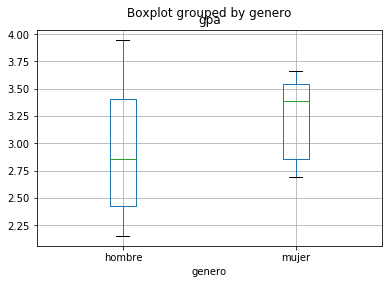

In [7]:
#Comparando los gpa de mujeres y varones usando boxplots
gpasex.boxplot(column='gpa',by='genero')

Interpretacion: Los Boxplots sugieren que los GPA de los varones es mas varoable que el de  las mujeres y que en promedio las mujeres parecen tener mejor GPA que los varones.

#### Ia, Comparando las varianzas poblacionales
#### $H_o: \sigma_1^2=\sigma_2^2$  
#### $H_a: \sigma_1^2\neq\sigma_2^2$

In [8]:
#Extrayendo los gpa de las mujeres y de los varones
grupo1=gpasex.query('genero=="mujer"')['gpa']
grupo2=gpasex.query('genero=="hombre"')['gpa']

In [9]:
grupo1

0     3.58
1     3.44
2     3.61
3     2.69
4     3.66
5     3.35
6     3.23
7     3.36
8     2.88
9     2.80
10    2.70
11    3.46
12    3.55
13    3.41
14    2.73
15    3.54
Name: gpa, dtype: float64

In [10]:
Ftest(grupo1,grupo2)

La prueba de F es: 0.32350488570880304 El p-value es: 0.04476447015599957


#### No hay igualdad de varianza

### Probando si las mujeres rinden mejor que los varones medias asumiendo distintas varianza
#### $H_o: \mu_1=\mu_2$  
#### $H_a: \mu_1>\mu_2$

La Prueba estadistica es una prueba de t con grados de libertad aproximados

In [12]:
#Usando el modulo statmodesls
ttest, pvalue,dof=sms.ttest_ind(grupo1, grupo2, usevar = 'unequal', alternative="larger")
print("ttest es:",ttest,"p-value es:",pvalue,"grados de libertad son:",dof)

ttest es: 1.4528007078528011 p-value es: 0.08263946885510189 grados de libertad son: 16.282466094946923


#### El pvalue es .083 un poco mayor de .05 No se rechaza la Ho. Las mujeres rinden igual que los varones


###  COMPARACION DE DOS GRUPOS USANDO MUESTRAS PAREADAS

In [13]:
presion=pd.read_table("http://academic.uprm.edu/eacuna/ejemplo715.txt",delim_whitespace=True)

In [14]:
presion

,Antes,Despues
0,70,68
1,80,72
2,72,62
3,76,70
4,76,58
5,76,66
6,72,68
7,78,52
8,82,64
9,64,72


In [15]:
#Extrayendo los presiones de los pacientes antes y despues  
antes=np.array(presion[['Antes']])
despues=np.array(presion[["Despues"]])
despues

array([[68],
       [72],
       [62],
       [70],
       [58],
       [66],
       [68],
       [52],
       [64],
       [72],
       [74],
       [60],
       [74],
       [72],
       [74]], dtype=int64)

#### Prueba de muestras pareadas
$H_o:\mu_0=0$ la media de las diferencias es cero, No hay efecto de la medicina

$H_a:\mu_0>0 $ la medicina hace bajar la presion

In [16]:
#Usando scipy.stats
stats.ttest_rel(antes,despues)

Ttest_relResult(statistic=array([3.10536049]), pvalue=array([0.00774944]))

#### Conclusion: Esta funcion da el p-value de la prueba de dos lados, el p-value la prueba de un solo dado 
#### es la mitad de este valor. O sea .0038, menor que 0.05. Se rechaza la hipotesis Nula
#### Hay suficiente evidencia estadistica para conluir que la medicina baja la presion

In [17]:
#Usando statmodels con ttest pero a la diferencia
sms.DescrStatsW(antes-despues).ttest_mean(0,"larger")  

(array([3.10536049]), array([0.00387472]), 14.0)

#### Esta funcion si da el p-value correcto

In [18]:
#Usando scipy,stats pero con ttest aplocado a la diferencia
ttest_1samp(antes-despues, 0)   

Ttest_1sampResult(statistic=array([3.10536049]), pvalue=array([0.00774944]))

#### Las funciones ttest_rel y ttest_1samp de spicy.stats hacen solo pruebas de hipotesis de dos lados